In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [2]:
df = pd.DataFrame.from_csv("Prediction.csv")  
df.head()
X=df.drop(['Winner'],axis=1)
y=df['Winner']
nX_test={'city':[],'venue':[],'toss_decision':[],"team1":[],"team2":[],"Toss":[],"HardHitter":[],"FastScorer":[],"Bat_Average":[],"Economy":[],"WicketTaker":[],"Bowl_Average":[],"Winner":[],"win_fact":[]}
nX_train={'city':[],'venue':[],'toss_decision':[],"team1":[],"team2":[],"Toss":[],"HardHitter":[],"FastScorer":[],"Bat_Average":[],"Economy":[],"WicketTaker":[],"Bowl_Average":[],"Winner":[],"win_fact":[]}
for i in range(0,60):
    for key in df.keys():
        nX_test[key].append(df[key][i])
for i in range(59,635):
    for key in df.keys():
        nX_train[key].append(df[key][i])
nX_test=pd.DataFrame(nX_test)
nX_train=pd.DataFrame(nX_train)

c:\users\abhijeet saraf\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Match winners')

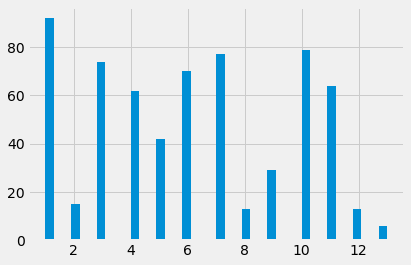

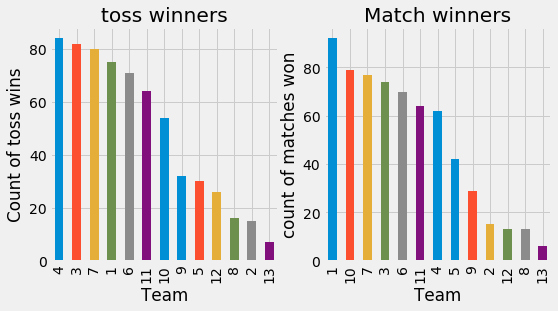

In [17]:
#X_test = nX_test.drop(['Winner'],axis=1)
#y_test = nX_test['Winner']
#X_train = nX_train.drop(['Winner'],axis=1)
#y_train = nX_train['Winner']
df['Winner'].hist(bins=40) 
temp1=df['Toss'].value_counts(sort=True)
temp2=df['Winner'].value_counts(sort=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

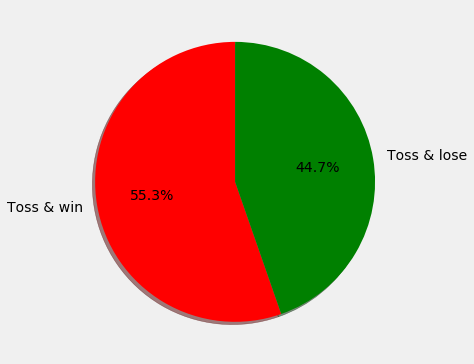

In [18]:
plt.style.use('fivethirtyeight')
df_fil=df[df['Toss']==df['Winner']]
df_fil.head()
slices=[len(df_fil),(636-len(df_fil))]
plt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
from sklearn.preprocessing import StandardScaler 
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

c:\users\abhijeet saraf\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\abhijeet saraf\appdata\local\programs\python\python35\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\abhijeet saraf\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(X_train, y_train)
#feat_labels=['HardHitter','Bat_Average','Bowl_Average','Economy','FastScorer','WicketTaker']
#for feature in zip(feat_labels, model.feature_importances_):
    #print(feature)
y_pred=model.predict(X_test)


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
t=accuracy_score(y_test, y_pred)
print(t)  

[[15  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  9  1  0  0  0  0  1  2  0  1]
 [ 0  0  0  1  5  0  2  0  0  0  1  0  0]
 [ 2  0  1  1  0 12  2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 18  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.68      0.94      0.79        16
           2       1.00      0.67      0.80         3
           3       0.92      0.92      0.92        13
           4       0.75      0.64      0.69        14
           5       0.83      0.56      0.67         9
           6       1.00      0.67      0.80        18
           7       0.78      0.90      0.84        20
           8       1

c:\users\abhijeet saraf\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


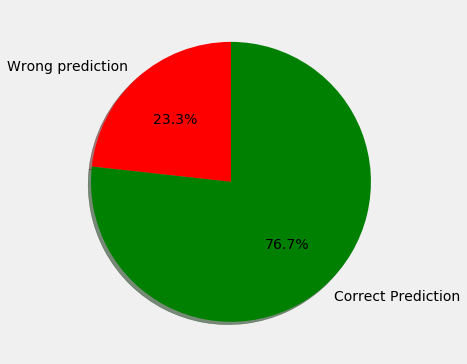

In [23]:
plt.style.use('fivethirtyeight')
df_fil=[]
i=0
for ind in y_test.index:
    if(y_test[ind]==y_pred[i]):
        df_fil.append(1)
    i+=1
i+=1
slices=[(i-len(df_fil)),(len(df_fil))]
plt.pie(slices,labels=['Wrong prediction','Correct Prediction'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [24]:
from sklearn.naive_bayes import GaussianNB 
model1 = GaussianNB() 
model1.fit(X_train, y_train)
#feat_labels=['HardHitter','Bat_Average','Bowl_Average','Economy','FastScorer','WicketTaker']
#for feature in zip(feat_labels, model.feature_importances_):
    #print(feature)
y_pred=model1.predict(X_test)

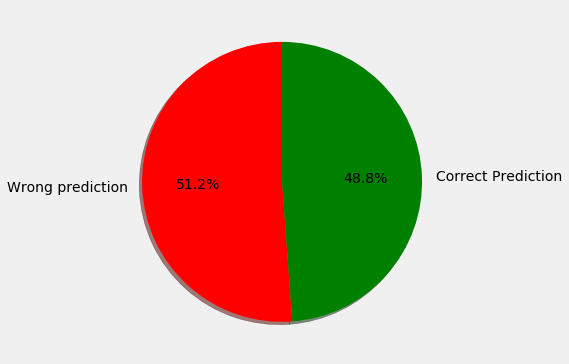

In [25]:
plt.style.use('fivethirtyeight')
df_fil=[]
i=0
for ind in y_test.index:
    if(y_test[ind]==y_pred[i]):
        df_fil.append(1)
    i+=1
i+=1
slices=[(i-len(df_fil)),(len(df_fil))]
plt.pie(slices,labels=['Wrong prediction','Correct Prediction'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[13  0  2  0  0  1  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  6  2  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  9  0  1  0  0  0  2  1  0  0]
 [ 0  0  1  2  2  2  1  0  0  0  1  0  0]
 [ 0  0  1  0  1  6  8  0  1  0  1  0  0]
 [ 1  0  0  0  0  1 13  1  0  1  2  0  1]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  1  0  2  1  1]
 [ 0  0  0  0  0  0  0  0  2  5  1  0  2]
 [ 0  0  0  0  0  0  0  0  0  2  5  0  5]
 [ 0  0  0  0  0  0  0  0  1  2  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1]]
              precision    recall  f1-score   support

           1       0.72      0.81      0.76        16
           2       0.33      0.33      0.33         3
           3       0.55      0.46      0.50        13
           4       0.69      0.64      0.67        14
           5       0.67      0.22      0.33         9
           6       0.55      0.33      0.41        18
           7       0.59      0.65      0.62        20
           8       0

In [27]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
#feat_labels=['HardHitter','Bat_Average','Bowl_Average','Economy','FastScorer','WicketTaker']
#for feature in zip(feat_labels, model.feature_importances_):
    #print(feature)
y_pred=clf.predict(X_test)

In [28]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[14  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  8  2  0  0  0  0  0  0  1  0  0]
 [ 1  0  4  4  1  1  1  0  0  2  0  0  0]
 [ 0  0  1  0  3  3  1  0  0  0  1  0  0]
 [ 1  0  2  1  0  8  6  0  0  0  0  0  0]
 [ 0  0  0  2  0  1 15  0  0  0  2  0  0]
 [ 0  0  0  0  0  1  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  3  0  0]
 [ 0  0  0  0  0  0  0  0  1  6  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  2 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0]]
              precision    recall  f1-score   support

           1       0.67      0.88      0.76        16
           2       0.00      0.00      0.00         3
           3       0.53      0.62      0.57        13
           4       0.40      0.29      0.33        14
           5       0.75      0.33      0.46         9
           6       0.53      0.44      0.48        18
           7       0.58      0.75      0.65        20
           8       0

c:\users\abhijeet saraf\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


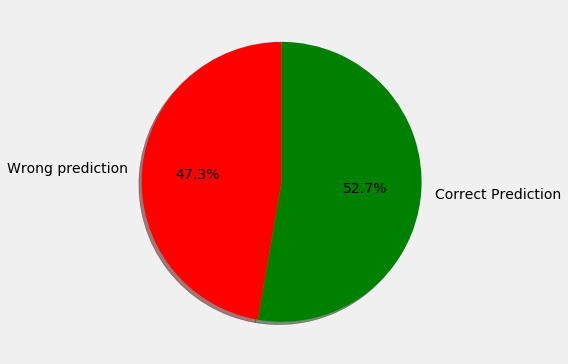

In [29]:
plt.style.use('fivethirtyeight')
df_fil=[]
i=0
for ind in y_test.index:
    if(y_test[ind]==y_pred[i]):
        df_fil.append(1)
    i+=1
i+=1
slices=[(i-len(df_fil)),(len(df_fil))]
plt.pie(slices,labels=['Wrong prediction','Correct Prediction'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()